In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [102]:
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 500)
reviews = pd.read_csv('csv/reviews.csv')
n_comments = len(reviews['comments']) 
for i in range(20):
    if (i % 2 == 0):
        print("{} \033[48;5;66m{} \33[0;0m".format(i,reviews['comments'][i]))
    elif (i % 3 == 0):
        print("{} \33[4;33m{} \33[0;0m".format(i,reviews['comments'][i]))
    else:
        print("{} \33[1;31m{} \33[0;0m".format(i,reviews['comments'][i]))

0 Great place to stay! Definitely a tiny home, but still cozy and comfortable. Pretty fun to try it out for a couple nights for the two of us. Joe was helpful and friendly. Destinations were always less than a 20min drive and lots of parks nearby! Super fun stay :) 
1 Joe was very friendly and gave us all the information we needed. The house was exactly as described on the site. It was fun and thought provoking experiencing a 100% Eco-friendly space. We plan on staying here again next time we're in Denver! 
2 Amazing property and Joe was a great host! Even offered to walk my dog while we were out! Will definitely be back 
3 Joe was a great host, the description of this tiny house was spot on.  It was definitely a small space but well laid out and very convenient.  I would recommend a stay there. 
4 He welcomes us when we first arrived and gave great recommendations for dinner/breakfast  
5 Great tiny home. Very ECO friendly and owner is very very nice.  
6 Joe was welcoming, explained 

In [4]:
airbnb = pd.read_csv('csv/listings.csv')
airbnb_condensed = pd.read_csv('csv/listings_condensed.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,177,https://www.airbnb.com/rooms/177,20210930023319,2021-09-30,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps 2 in the loft, linens included, no pets please (property is shared with 2 senior dogs), private parking, private entrance.<br /><br />The Tiny Home is limited 2 PAID guests. No other guests unless the owner approves in advance.<br /><br /><b>The space</b><br />Here's the fun details of this Tiny Home experience in the middle of the city:<br /><br />160 sq ft + 80 sq ft in the loft for sleeping, Sleeps 2 in the loft, linens included, no pets please (property is shared with 2 senior dogs), private parking, private entrance.<br />Outside entertainment area with BBQ grill. Enjoy those wonderful Colorado evenings with colleagues or friends!<br /><br />The Tiny Home is limited 2 PAID guests. No other guests unless the owner approves in advance.<br /><br />Private entrance to large open space park with access to bike and running paths that link the entire city.<br /><br />8 minutes to Downtown Denver.<br />5 minutes to Cherry Creek Shopping...","Quiet neighborhood next to park, creeks and bike trails",https://a0.muscache.com/pictures/a1745ab2-b3a0-4df6-ad3c-435d58ac0981.jpg,615,https://www.airbnb.com/users/show/615,Joe,2008-07-07,"Denver, Colorado, United States","I'm originally from Oklahoma, but have lived in Denver most of my life. I'm a local business owner who enjoys getting outdoors!",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/905d6ce3-2629-4490-91f2-3042d3a47b2e.jpg?aki_policy=profile_small,https://a0.muscache.com/im/pictures/user/905d6ce3-2629-4490-91f2-3042d3a47b2e.jpg?aki_policy=profile_x_medium,Virginia Village,2,2,"['email', 'phone', 'google', 'reviews', 'kba']",t,f,"Denver, Colorado, United States",Virginia Village,NaN,39.69551,-104.92489,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,0.0,"[""Shampoo"", ""Fire extinguisher"", ""BBQ grill"", ""Refrigerator"", ""Hot water"", ""Carbon monoxide alarm"", ""Heating"", ""Patio or balcony"", ""Free street parking"", ""Coffee maker"", ""Security cameras on property"", ""Keypad"", ""Essentials"", ""Dishes and silverware"", ""Kitchen"", ""Wifi"", ""TV"", ""Microwave"", ""Smoke alarm"", ""Stove"", ""Cooking basics"", ""Long term stays allowed"", ""Dedicated workspace"", ""Bed linens"", ""Backyard"", ""Free parking on premises"", ""Air conditioning"", ""Luggage dropoff allowed""]",$99.00,1,400,1.0,2.0,1125.0,1125.0,1.4,1125.0,NaN,t,7,35,65,340,2021-09-30,89,22,2,2016-11-14,2021-09-24,4.81,4.97,4.85,4.97,4.93,4.84,4.77,2016-BFN-0004968,f,2,2,0,0,1.50
1,360,https://www.airbnb.com/rooms/360,20210930023319,2

In [5]:
airbnb.shape


(3850, 74)

In [6]:


print(airbnb.isnull().sum())


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
description                                       32
neighborhood_overview                            999
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      7
host_about                                      1400
host_response_time                               680
host_response_rate                               680
host_acceptance_rate                             528
host_is_superhost                                  0
host_thumbnail_url                            

In [7]:
airbnb.dtypes
airbnb.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [8]:
print(len(airbnb['host_neighbourhood'].unique()))
print(len(airbnb['neighbourhood_cleansed'].unique()))
airbnb['host_neighbourhood'].unique()


139
78


array(['Virginia Village', 'Highland', 'Five Points', 'North Park Hill',
       'North Capitol Hill', 'Baker', 'West Highland', 'Capitol Hill',
       'Ballpark', 'Washington Park', 'South Park Hill', 'LoDo',
       'Washington Park West', 'City Park West', 'Clayton', 'City Park',
       'Stapleton', nan, 'Lowry Field', 'Platt Park', 'Sunnyside',
       'Congress Park', 'CBD', 'Berkeley', 'Lincoln Park', 'Cole',
       'Cheesman Park', 'West Colfax', 'Speer', 'University', 'Hilltop',
       'Northwest', 'Country Club', 'Cory - Merrill', 'Athmar Park',
       'Windsor', 'Gateway / Green Valley Ranch', 'Indian Creek', 'West',
       'Rosedale', 'Fort Logan', 'Skyland', 'Cimarron Foothills Estates',
       'Whittier', 'Hale', 'Washington Virginia Vale', 'Bear Valley',
       'Harvey Park', 'Central', 'Golden Triangle', 'Jefferson Park',
       'Harvey Park South', 'University Park', 'Molholm/Two Creeks',
       'Montclair', 'Goldsmith', 'Sloane Lake', 'Hampden',
       'Zona Hotelera', 'H

In [9]:
airbnb['neighbourhood'].unique()

array(['Denver, Colorado, United States', nan,
       'Englewood, Colorado, United States',
       'Lakewood, Colorado, United States',
       'Wheat Ridge, Colorado, United States',
       'Aurora, Colorado, United States',
       'Wheat ridge, Colorado, United States',
       'Stapleton, Denver, Colorado, United States',
       'Littleton, Colorado, United States',
       'Denver , Colorado, United States', 'Denver , Co, United States',
       'Edgewater, Colorado, United States'], dtype=object)

In [10]:
airbnb['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [11]:
airbnb.isnull().sum()


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
description                                       32
neighborhood_overview                            999
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                      7
host_about                                      1400
host_response_time                               680
host_response_rate                               680
host_acceptance_rate                             528
host_is_superhost                                  0
host_thumbnail_url                            

In our case, the missing values that are observed do not need too much treatment. Looking into our dataset, we can state columns ‘ name’ and ‘host_name’, ‘last_review’ are irrelevant and unethical for further data exploration analysis. Therefore, we can get rid of those columns.


In [12]:
print(airbnb['name'].value_counts())
print(airbnb['host_name'].nunique()) #unique hosts


Well-kept apartment home | 2 BR in Denver            11
Textured Life | 1 BR in Denver                        9
Well-kept apartment home | 1 BR in Denver             8
Comforts of home | 1 BR in Denver                     8
Comforts of home | 2 BR in Denver                     7
                                                     ..
LoHi Guesthouse Monthly Rental with 1GB Internet      1
Boho Cottage Apartment in Historic Highlands          1
Amazing LODO Sky Views                                1
Gorgeous house and comfortable for guests             1
RIVERFRONT PARK UNION STATION!  COZY LUXURY LOFT!     1
Name: name, Length: 3735, dtype: int64
1295


In [13]:
print(airbnb['price'])
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')
airbnb['price'] = airbnb['price'].astype(float)

0        $99.00
1       $135.00
2       $179.00
3        $54.00
4        $52.00
         ...   
3845    $115.00
3846    $131.00
3847    $625.00
3848    $160.00
3849    $159.00
Name: price, Length: 3850, dtype: object


<ipython-input-13-3e59d4a0b868>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb['price'] = airbnb['price'].str.replace('$', '')


/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

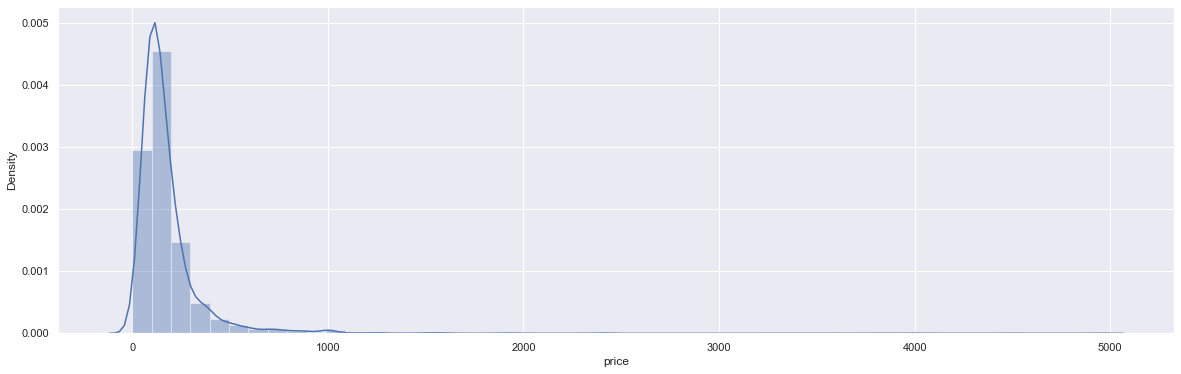

In [14]:
#distplot
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(airbnb['price'],hist=True)

74


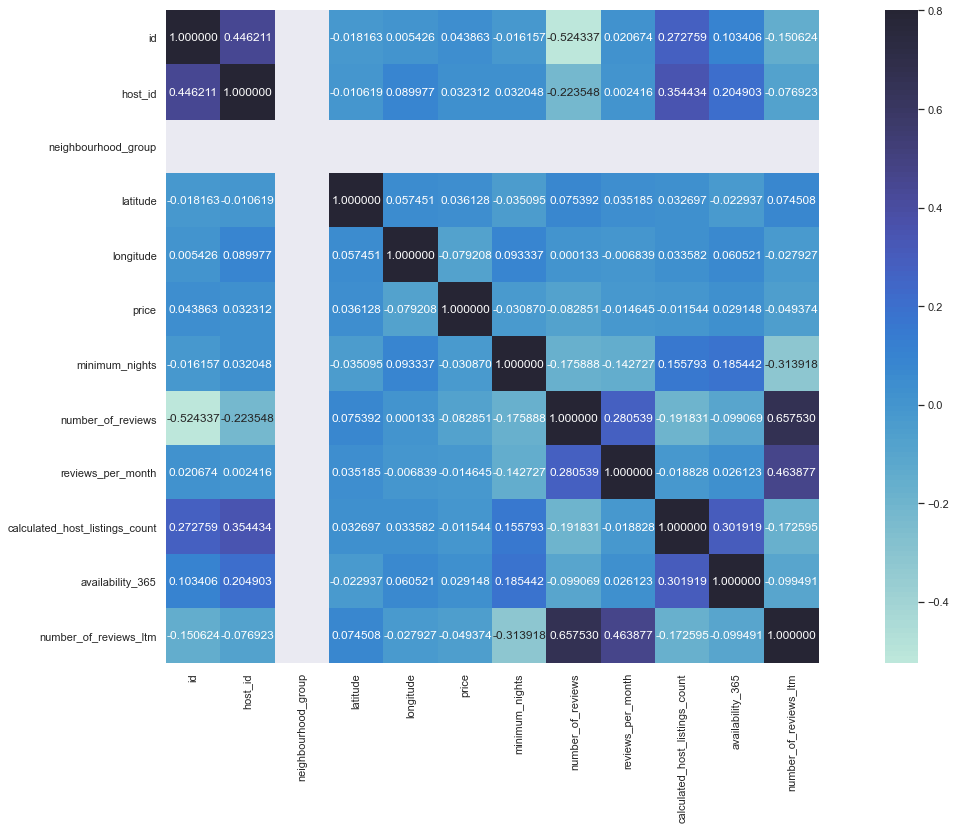

In [15]:
corrmat_condensed = airbnb_condensed.corr()

f1, ax1 = plt.subplots(figsize=(24, 12))
sns.heatmap(corrmat_condensed, vmax=.8, square=True, center=1,annot=True, fmt="f");
print(len(airbnb.columns))


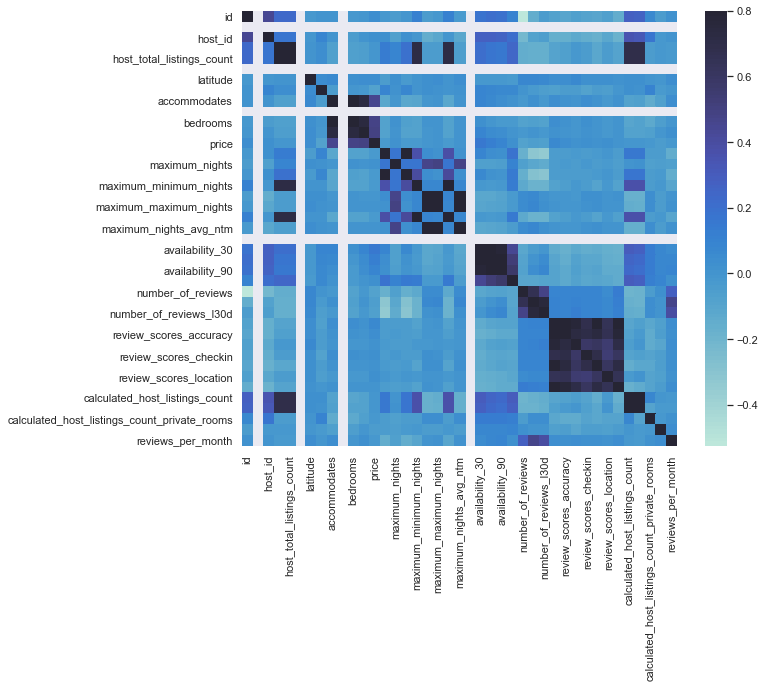

In [16]:
corrmat = airbnb.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True, center=1);


/Users/kevinvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

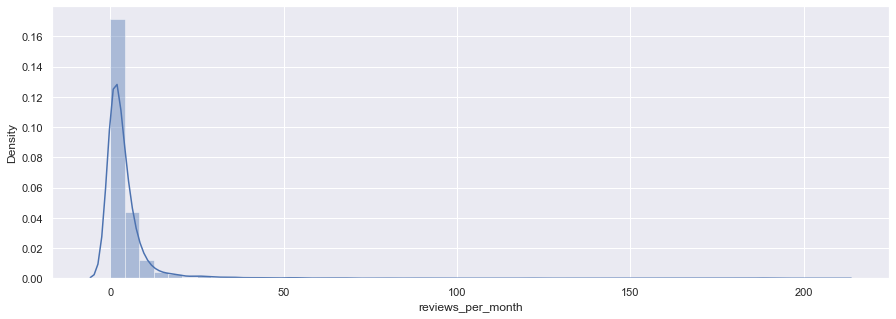

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(airbnb['reviews_per_month'])

Text(0.5, 1.0, 'Location Co-ordinates')

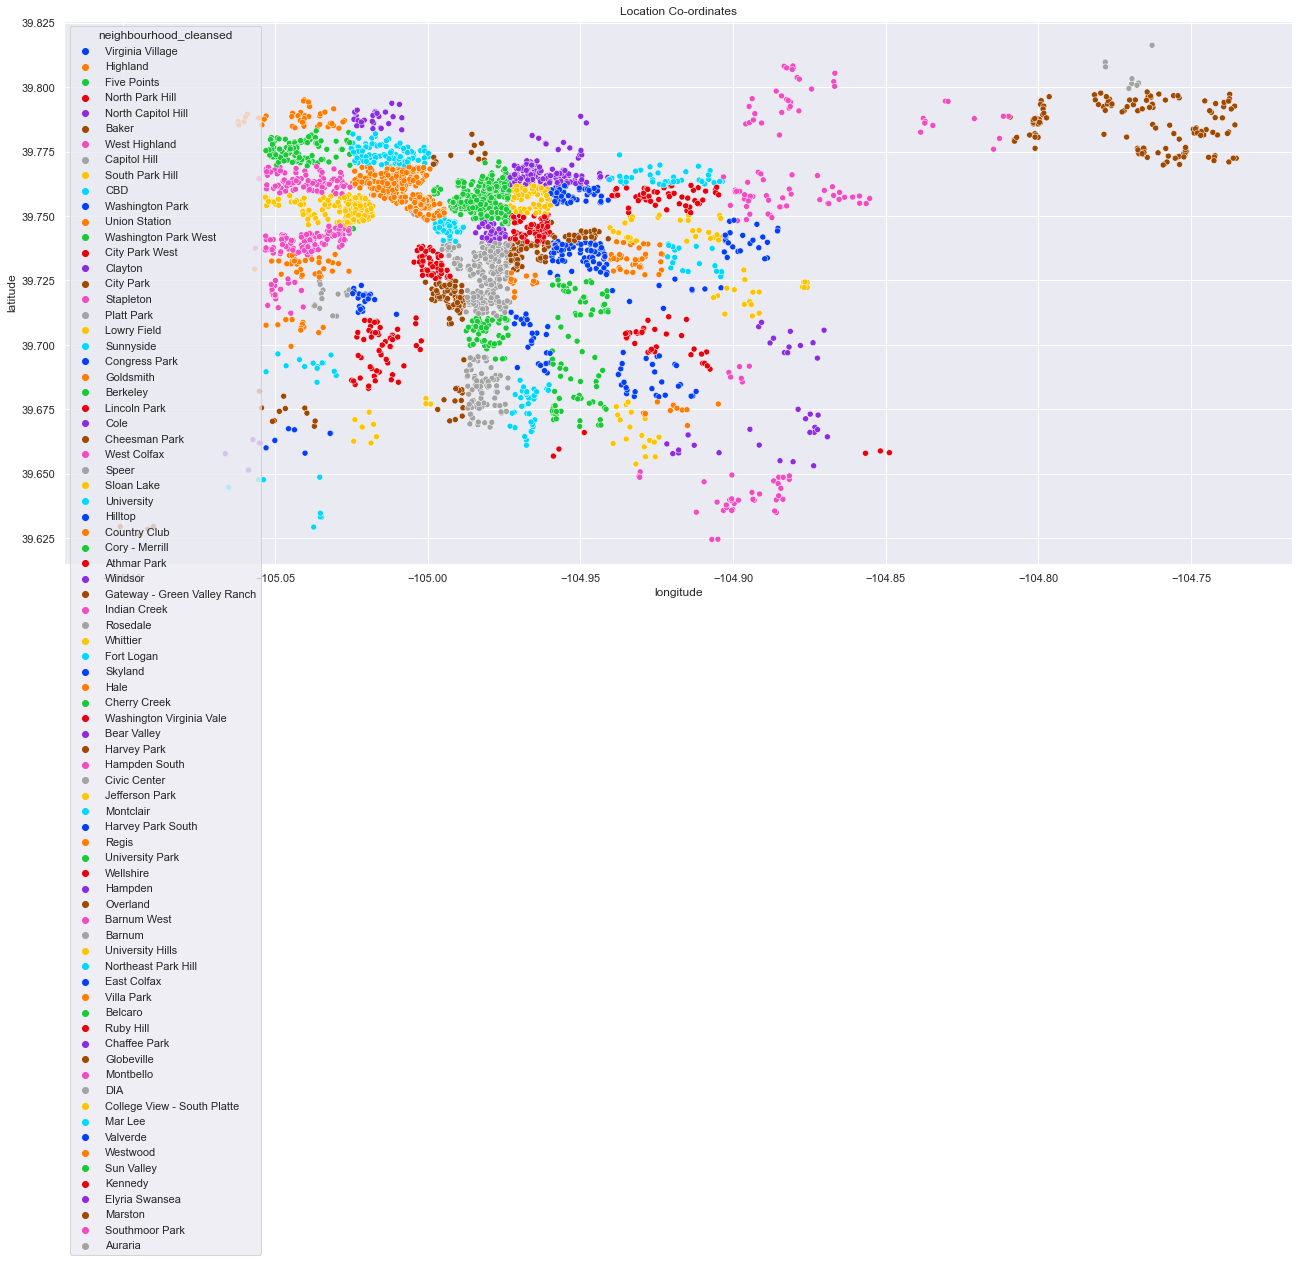

In [18]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (22, 10)})
ax=sns.scatterplot(data=airbnb, x="longitude", y="latitude",hue='neighbourhood_cleansed', palette='bright')
ax.set_title('Location Co-ordinates')

In [19]:
# #trying to find where the coordinates belong from the latitude and longitude
# sns.set(rc={"figure.figsize": (22, 10)})
# ax=sns.scatterplot(data=airbnb, x="longitude", y="latitude", hue='price', palette='bright')
# ax.set_title('Location Co-ordinates')


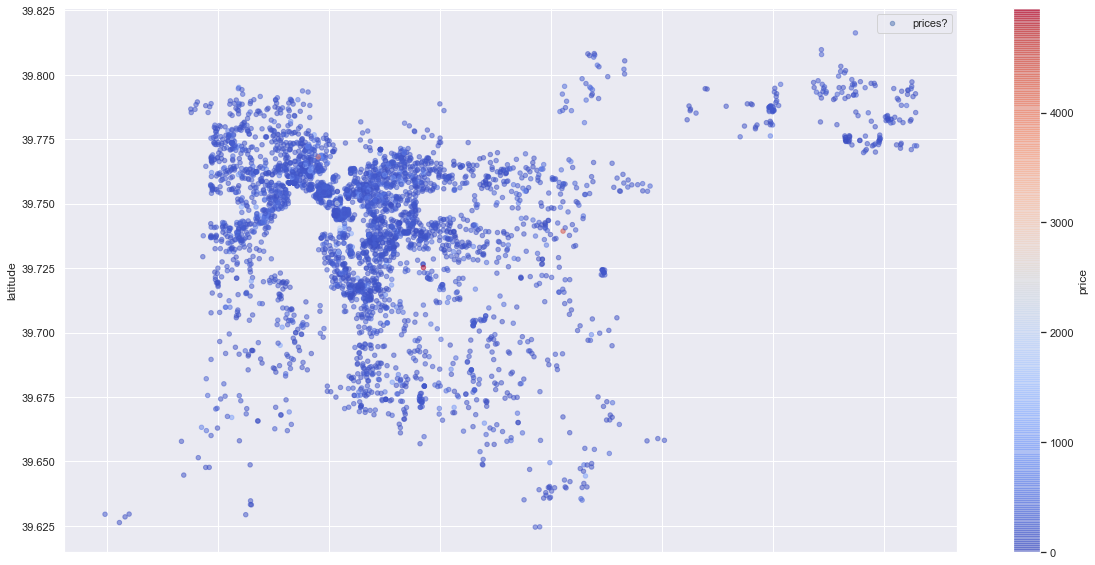

In [20]:
lat_long=airbnb.plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('coolwarm'), colorbar=True, alpha=0.50, figsize=(20,10))
lat_long.legend()


In [21]:
airbnb['price'].describe()

count    3850.000000
mean      178.458182
std       205.810491
min         0.000000
25%        90.000000
50%       132.000000
75%       199.000000
max      4950.000000
Name: price, dtype: float64

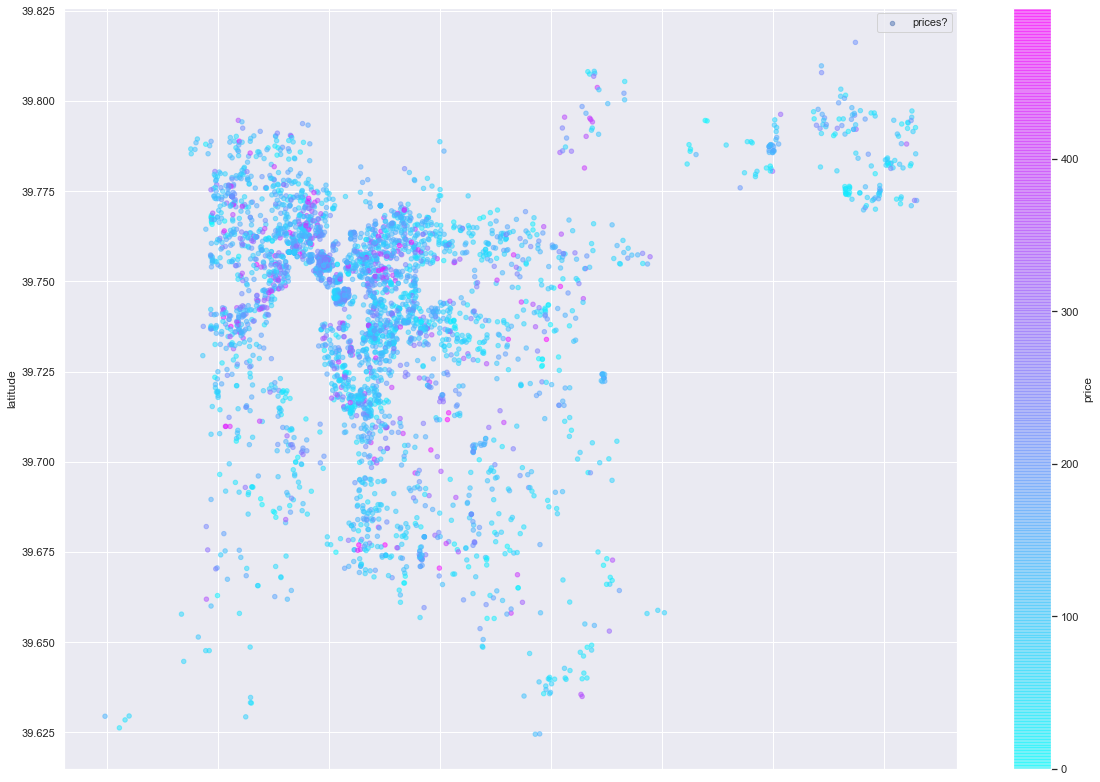

In [22]:
lat_long=airbnb[(airbnb['price'])<500].plot(kind='scatter', x='longitude', y='latitude', label='prices?', c='price',
                  cmap=plt.get_cmap('cool'), colorbar=True, alpha=0.50, figsize=(20,14))
lat_long.legend()

In [23]:
len(airbnb[(airbnb['price'])<500])

3695